In [1]:
# loading the machine learning packages
import numpy as np 
import pandas as pd 




In [2]:
# Import Iris data into Python
iris_data=pd.read_csv('Iris.csv')
print(iris_data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [3]:
#exploring data 
iris_data.head()
iris_data.info()
iris_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

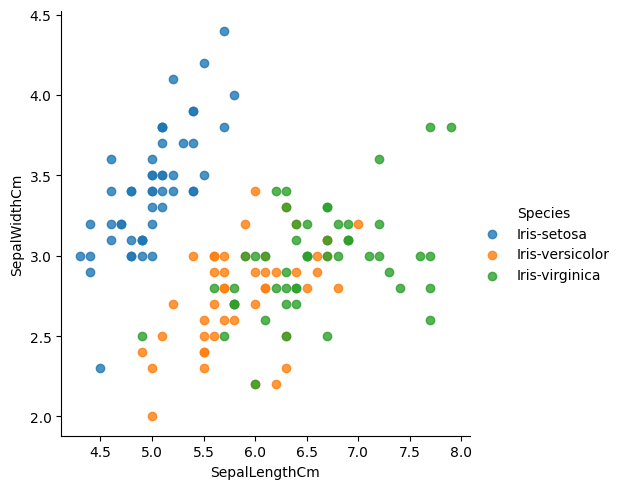

In [4]:

#visualizing data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=iris_data, hue='Species',fit_reg=False)


In [5]:
#preprocessing data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
iris_data["Species_code"] = ord_enc.fit_transform(iris_data[["Species"]])
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.0


In [6]:
#split data into features and target
X=iris_data.drop(columns=['Species','Species_code'])
X.head()
y=iris_data['Species_code']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Species_code, dtype: float64

In [7]:
#create training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=1984)
y_test

75     1.0
114    2.0
118    2.0
55     1.0
20     0.0
147    2.0
100    2.0
83     1.0
63     1.0
41     0.0
23     0.0
77     1.0
141    2.0
65     1.0
22     0.0
73     1.0
95     1.0
16     0.0
126    2.0
26     0.0
66     1.0
85     1.0
94     1.0
59     1.0
40     0.0
82     1.0
99     1.0
128    2.0
132    2.0
69     1.0
32     0.0
113    2.0
13     0.0
9      0.0
122    2.0
27     0.0
106    2.0
17     0.0
89     1.0
98     1.0
58     1.0
36     0.0
80     1.0
28     0.0
81     1.0
91     1.0
139    2.0
61     1.0
62     1.0
79     1.0
Name: Species_code, dtype: float64

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [9]:
y_pred=knn.predict(X_test)

In [10]:
print(y_pred)

[1. 2. 2. 1. 0. 2. 2. 1. 1. 0. 0. 1. 2. 1. 0. 1. 1. 0. 2. 0. 1. 1. 1. 1.
 0. 1. 1. 2. 2. 1. 0. 2. 0. 0. 2. 0. 2. 0. 1. 1. 1. 0. 1. 0. 1. 1. 2. 1.
 1. 1.]


In [126]:
print(np.mean(y_pred==y_test))

1.0


<function matplotlib.pyplot.show(close=None, block=None)>

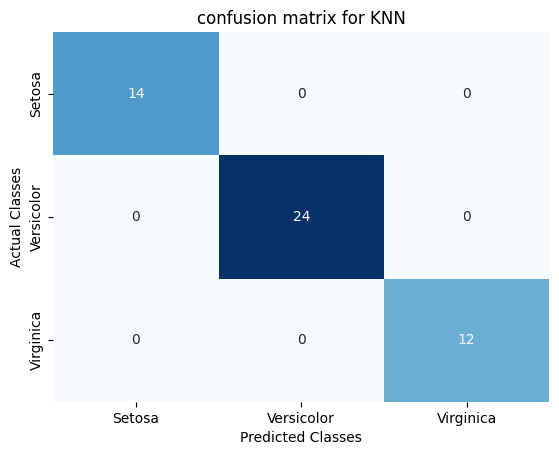

In [22]:
y_pred=knn.predict(X_test)

from sklearn.metrics import classification_report
from sklearn import metrics

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title("confusion matrix for KNN")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.xticks(np.arange(3)+0.5, ["Setosa", "Versicolor", "Virginica"])
plt.yticks(np.arange(3)+0.5, ["Setosa", "Versicolor", "Virginica"])

plt.show

In [23]:
print(classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred,  output_dict=True)
df = pd.DataFrame(report).transpose()

# Print the dataframe
print(df)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        24
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Precision  is defined as the number of true positivES divided by the sum of true positives and false positives 
            example: Out of all the images that the model predicted as cats, how many are actually cats?
            
Recall     is defined as the number of true positives divided by the sum of true positives and false negatives 
            example: Out of the 10 images of cats, how many did the model correctly identify as cats? 
            
F1-score = 2 * (precision * recall) / (precision + recall)
The F-score is a useful metric when the dataset is imbalanced, meaning that there are more instances of one class than the other. In such cases, accuracy may not be a good metric, as it can be misleading due to the disproportionate number of instances in each class. F-score, on the other hand, takes into account both precision and recall, making it a more reliable metric for evaluating the performance of a model in imbalanced datasets.

Support indicates how many instances of each class were actually present in the test set, regardless of whether they were correctly or incorrectly classified by the model. For exmaple, there were 14 instances of class 0 in the test dataset.

The macro average is simply the averge of precision, recall, and F1-score for each class separately.
Weighted average is weighted by the number of instances in each class. 